# Points Exploratory Data Analysis

## Importing and Describing Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/clean')

game_data = pd.read_csv('game_data_2022_clean.csv')
game_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668 entries, 0 to 3667
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attendance          0 non-null      float64
 1   away_conference     3615 non-null   object 
 2   away_division       3615 non-null   object 
 3   away_id             3668 non-null   int64  
 4   away_line_scores    3655 non-null   object 
 5   away_points         3367 non-null   float64
 6   away_post_win_prob  1409 non-null   float64
 7   away_postgame_elo   735 non-null    float64
 8   away_pregame_elo    738 non-null    float64
 9   away_team           3668 non-null   object 
 10  completed           3668 non-null   bool   
 11  conference_game     3668 non-null   bool   
 12  excitement_index    1413 non-null   float64
 13  highlights          0 non-null      float64
 14  home_conference     3659 non-null   object 
 15  home_division       3659 non-null   object 
 16  home_i

## Ploting Points

In [2]:
# Creating variables for points data
home_points = game_data['home_points']
away_points = game_data['away_points']

(0.0, 900.0)

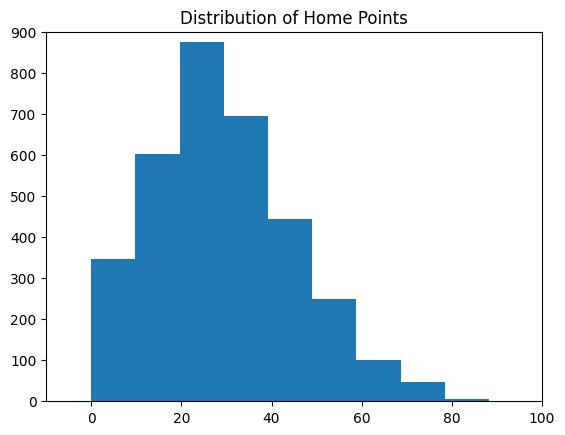

In [3]:
plt.title('Distribution of Home Points')
plt.hist(home_points)
plt.xlim([-10, 100])
plt.ylim([0,900])

(0.0, 900.0)

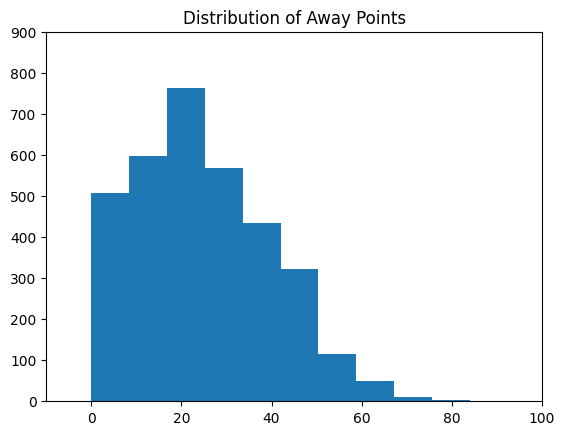

In [4]:
plt.title('Distribution of Away Points')
plt.hist(away_points)
plt.xlim([-10, 100])
plt.ylim([0,900])

(-10.0, 100.0)

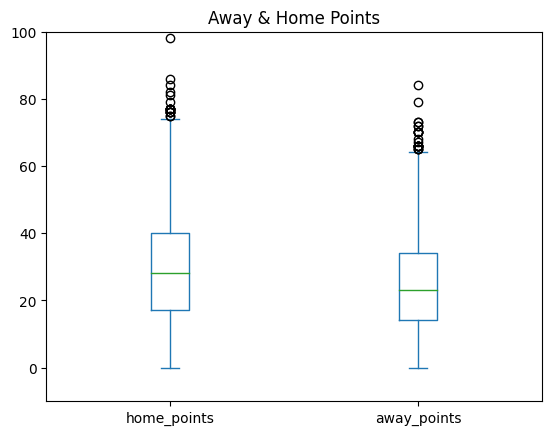

In [5]:
game_data[['home_points', 'away_points']].plot(kind='box')
plt.title('Away & Home Points')
plt.ylim([-10, 100])

It appears that home teams have a slight advantage vs. away teams as their distribution is higher.

## Running a Two Sample T-test

**Assumptions:**
1. The observations are independent
2. The data are normally distributed
3. The variances of the two groups are equal

*The assumption of normal distribution and equal variances are not met. The data will need to be transformed and we will need to assume unequal variance in the test.*

### Transforming Data

In [8]:
# Transforming the values so they are more normal. Then will run the t-test if distributions are normal.

import numpy as np

# Dropping NA values then taking sqrt of all other values
home_points_sqrt = np.sqrt(game_data['home_points'].dropna())
away_points_sqrt = np.sqrt(game_data['away_points'].dropna())

### Checking Distributions

(array([ 80.,  54., 192., 422., 717., 855., 642., 294., 106.,   5.]),
 array([0.        , 0.98994949, 1.97989899, 2.96984848, 3.95979797,
        4.94974747, 5.93969696, 6.92964646, 7.91959595, 8.90954544,
        9.89949494]),
 <BarContainer object of 10 artists>)

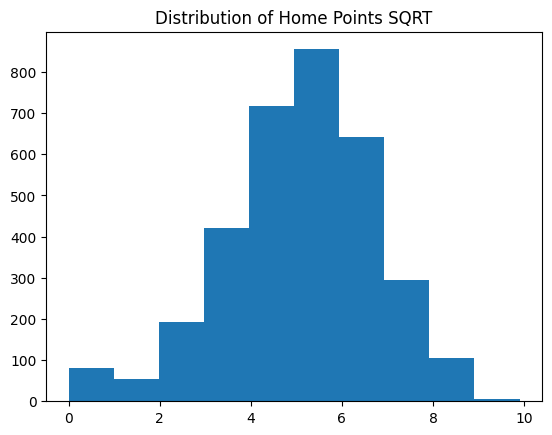

In [9]:
plt.title('Distribution of Home Points SQRT')
plt.hist(home_points_sqrt)

(array([177.,  74., 253., 316., 628., 798., 623., 373., 114.,  11.]),
 array([0.        , 0.91651514, 1.83303028, 2.74954542, 3.66606056,
        4.58257569, 5.49909083, 6.41560597, 7.33212111, 8.24863625,
        9.16515139]),
 <BarContainer object of 10 artists>)

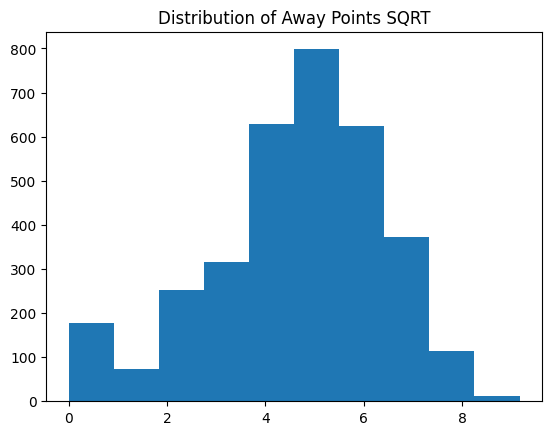

In [10]:
plt.title('Distribution of Away Points SQRT')
plt.hist(away_points_sqrt)

These distributions are much more normal. We will quickly check the mean and variance, then we will run our t-test with the new sqrt variables. 

#### Checking Means

In [11]:
# Checking mean of home_points_sqrt
home_points_sqrt.mean()


5.124547702309633

In [12]:
# Checking mean of away_points_sqrt
away_points_sqrt.mean()

4.621695456383731

#### Checking Variance

Variance unequal

In [13]:
# Checking variance of home_points_sqrt
home_points_sqrt.var()

2.7618091268620253

In [14]:
# Checking variance of away_points_sqrt
away_points_sqrt.var()

3.1368532507796076

### Two Sample T-Test

**Ho**: home_points_sqrt = away_points_sqrt

**Ha**: home_points_sqrt <> away_points_sqrt

**Alpha** = 0.05

In [16]:
from scipy import stats

# Perform the two sample t-test with unequal variances
stats.ttest_ind(a=home_points_sqrt, b=away_points_sqrt, equal_var=False)

Ttest_indResult(statistic=12.0139323693884, pvalue=6.52576822995894e-33)

We can _reject Ho_ at the significance level 0.05, because the p-value does not exceed 0.05.